## Day 46: Financial Data Analysis 
For this challenge, you are going to analyze the 
financial_data CSV file. You will import the file using 
pandas and answer the questions below. 


In [1]:
import pandas as pd
df = pd.read_csv("financial_data.csv")
df.head()

,Date,Revenue,Expenses,Profit
0,31 01 2022,19000,5000,14000
1,28 02 2022,16000,5500,10500
2,31 03 2022,10000,7000,3000
3,30 04 2022,18000,8000,10000
4,31 05 2022,25000,9000,16000


1. What is the average monthly revenue, expenses, and 
profit? 


In [4]:
# Calculate the average monthly revenue, expenses, and profit

avg_revenue = df["Revenue"].mean()
avg_expenses = df["Expenses"].mean()
avg_profit = df['Profit'].mean()

print(f"Average monthly revenue is {avg_revenue:.2f}")
print(f"Average monthly expenses is {avg_expenses:.2f}")
print(f"Average monthly profit is {avg_profit:.2f}")

Average monthly revenue is 35200.00
Average monthly expenses is 15425.00
Average monthly profit is 19775.00


2. How does the profit margin vary over time? Plot a line 
plot of the changes in profit margin. 


In [12]:
# calculate the profit margin 
df['Profit Margin'] = (df['Profit'] / df['Revenue']) * 100

# Converting date to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

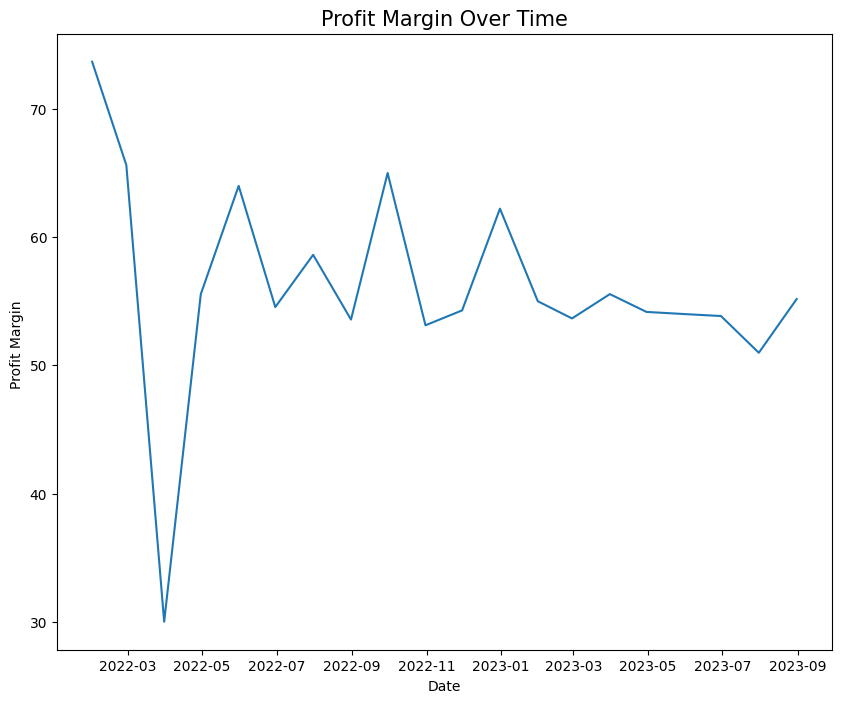

In [15]:
import matplotlib.pyplot as plt 

# plot the profit margin over time
plt.figure(figsize=(10, 8))
plt.plot(df["Date"], df["Profit Margin"])
plt.xlabel('Date')
plt.ylabel('Profit Margin ')
plt.title('Profit Margin Over Time', fontsize=15)
plt.show()

3. What is the difference between the revenue of the highest 
month and that of the lowest month? Which month has the 
highest revenue, and which month has the lowest revenue? 


In [27]:
# Extract month from Date
df["Month"] = df["Date"].dt.month_name()

highest_month = df.loc[df['Revenue'] == df['Revenue'].max(), 'Month'].values[0]
lowest_month = df.loc[df['Revenue'] == df['Revenue'].min(), 'Month'].values[0]

print(f"The month with highest revenue is :{highest_month}")

print(f"The month with lowest revenue is :{lowest_month}")


The month with highest revenue is :August
The month with lowest revenue is :March


4. Which months had expenses above $10,000? 


In [28]:
month_expenses_above_10 = df.loc[df['Expenses'] > 10000, 'Month']
month_expenses_above_10

6          July
7        August
8     September
9       October
10     November
11     December
12      January
13     February
14        March
15        April
16          May
17         June
18         July
19       August
Name: Month, dtype: object

5. How much profit was made in the last quarter of 2022? 


In [29]:
# group the data by quarters
df2 = df.groupby(df["Date"].dt.to_period('Q'))["Revenue"].sum()
df2

Date
2022Q1     45000
2022Q2     65000
2022Q3     97000
2022Q4    112000
2023Q1    126000
2023Q2    150000
2023Q3    109000
Freq: Q-DEC, Name: Revenue, dtype: int64

6. What was the percentage change in revenue from quarter 
to quarter?

In [30]:
# calculate the percentage change in revenue from quarter to quarter 
quarterly_revenue_change = df2.pct_change()

print("Percentage change in revenue from quarter to quarter:")
print(f'{quarterly_revenue_change}')

Percentage change in revenue from quarter to quarter:
Date
2022Q1         NaN
2022Q2    0.444444
2022Q3    0.492308
2022Q4    0.154639
2023Q1    0.125000
2023Q2    0.190476
2023Q3   -0.273333
Freq: Q-DEC, Name: Revenue, dtype: float64
